In [ ]:
pip install yfinance

# Librerías

In [ ]:
import yfinance as yf
import random as rndm
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller
from scipy.stats import wishart
import scipy.stats as sp 

# Tarea 7
## Temas Selectos de Estadística
### Diego Ramírez Araque

* https://github.com/dieraq/-TSE_Tarea_07

## Ejercicio 1

Reproducir la figura del ejercicio 1 utilizando los siguientes parámetros: $q=0.5$,$r=0.5$. Se han usado unidades arbirtrarias de tal manera que $\mathcal{R}^2 = 1$ cuando $\mathcal{G}=1$.

#### Solución

Calculamos: </br>
\begin{align}
  \mathcal{R}_{true}^{2} &= \frac{\mathcal{G}^{2}}{p(1+r)} \\
  \mathcal{R}_{in}^{2} &= \mathcal{R}^{2}_{true} (1-q) \\
  \mathcal{R}_{out}^{2} &= \frac{\mathcal{R}^{2}_{true}}{1-q} \\
  \mathcal{R}_{in}^{2} (\Xi) &= \frac{\mathcal{G}^2}{p}\frac{r+q}{(1+r)(r+q(r+1))}\\
  \mathcal{R}_{out}^{2} (\Xi) &= \frac{\mathcal{G}^2}{p}\frac{r+q+rq}{(r+q)(1+r)}
\end{align}

In [ ]:
G = np.linspace(0,1.45,1000) # Ganancia esperada del portafolio
q = 0.5
r = 0.5
p = 1/(1+r)
# In and Out and true
R_t =  lambda G: (G**2)/(p*(1+r))
R_i = lambda R: R*(1-q)
R_o = lambda R: R/(1-q)
R_true = R_t(G).flatten()
R_in = R_i(R_true).flatten()
R_out = R_o(R_true).flatten()
R_in_or = (G**2/p)*((r+q)/((1+r)*(r+q*(r+1))))
R_out_or = (G**2*(r+q+r*q))/(p*(r+q)*(1+r))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  after removing the cwd from sys.path.


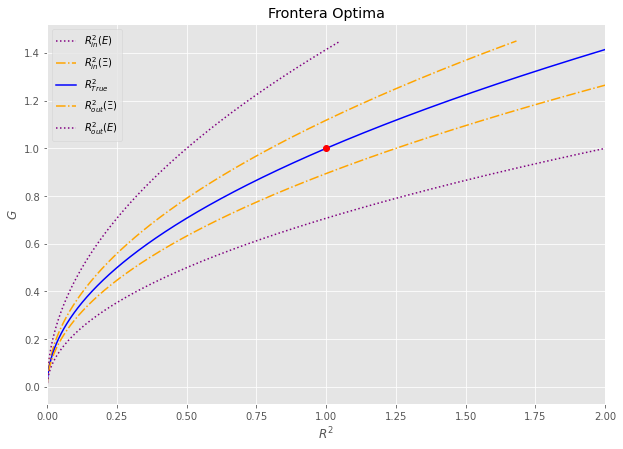

In [ ]:
fig = plt.figure(figsize = (10, 7))
#plt.style.use('ggplot')
plt.plot(R_in, G,ls="--", label ="$R_{in}^2(E)$", c ="purple",linestyle='dotted')
plt.plot(R_in_or, G,ls="--", label ="$R_{in}^2(\Xi)$", c ="orange",linestyle='dashdot')
plt.plot(R_true, G, label ="$R_{True}^2$", c ="blue",linestyle='solid')
plt.plot(R_out_or, G, label ="$R_{out}^2(\Xi)$", c ="orange",linestyle='dashdot')
plt.plot(R_out, G, label ="$R_{out}^2(E)$", c ="purple",linestyle='dotted')
plt.plot(1,1, marker="o", color="red")
plt.xlim((0, 2)) 
plt.title("Frontera Optima")
plt.xlabel("$R^2$")
plt.ylabel("$G$")
plt.legend()

## Ejercicio 2

La figura de este ejercicio muestra la frontera óptima para el proceso verdadeor, dentro de muestra y fuera de muestra en el caso de una matriz Wishart $W_q (0,\sigma^2 I)$ donde $q=0.5,p=100,\sigma^{2}=0.2$ y $g=\texttt{1}$

Reproduzca la figura del ejercicio 3 y responda las siguientes preguntas:

#### Solución

Calculamos: </br>
\begin{align}
  \mathcal{R}_{true}^{2} &= \frac{\mathcal{G}^{2}}{g'\Sigma^{-1}g} \\
  \mathcal{R}_{in}^{2} &= \frac{\mathcal{G}^{2}}{g'E^{-1}g} \\
  \mathcal{R}_{out}^{2} &=  \frac{\mathcal{C}^{2}g' E^{-1}\tilde{E}E^{-1} g}{g'E^{-1} g} 
\end{align}

* Con matriz de Covarianzas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


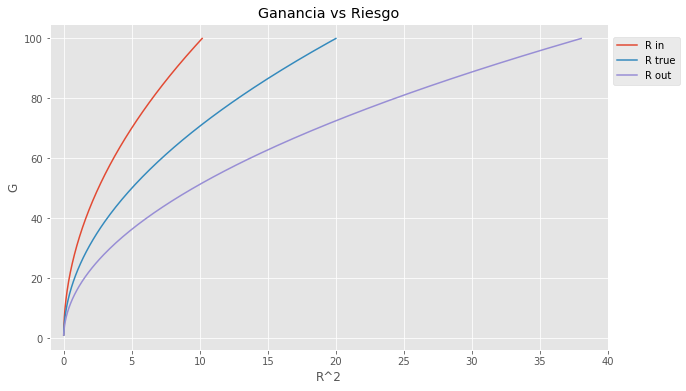

In [ ]:
""" Implementacion Rs """
def R_t(G, S, g):
    return G**2 / (g.T@np.linalg.inv(S)@g).flatten()
def R_in(G, E, g):
    return G**2 / (g.T@np.linalg.inv(E)@g).flatten()
def R_out(G, E, S, g):
    return ((G**2)*(g.T@np.linalg.inv(E)@S@np.linalg.inv(E)@g) / ((g.T@np.linalg.inv(E)@g)**2)).flatten()
""" Parametros Sigma y E , Dominio G"""
np.random.seed(seed=47)
p = 100
g = np.ones((p,1)) 
G = np.linspace(1,100,200)
S = np.identity(p)*0.2
W = wishart.rvs(df=200, scale=S, size =1, random_state = None)
E = W/199

""" Covarianzas In-sample  True  Out-sample """
R_true = R_t(G,S,g) # True
R_in = R_in(G,E,g) # In-sample
R_out = R_out(G,E, S, g) # Out-sample
fig = plt.figure(figsize = (10, 6))
plt.xlim((-1, 40))
plt.plot(R_in.flatten(), G, label ="R in")
plt.plot(R_true.flatten(), G, label ="R true")
plt.plot(R_out.flatten(), G, label ="R out")
plt.title("Ganancia vs Riesgo")
ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

* Correlaciones

Se sabe que la matriz de correlaciones $C$ está dada por las estradas $c_{ij} = \frac{cov(X_i,X_j)}{\sqrt{var(X_i)var(X_j)}}$. En este caso como $\Sigma_{ii} = 0.2$ y $\Sigma_{ij} = 0$ para toda $i\neq j$, entonces tenemos que $C=\Sigma/\sigma^{2}$ ya que en este caso en general se cumple que $var(X_i)=var(X_j)=0.2$.

La implemtación que se muestra a continuación se basa en este hecho sustituyendo $\Sigma$ por $C$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


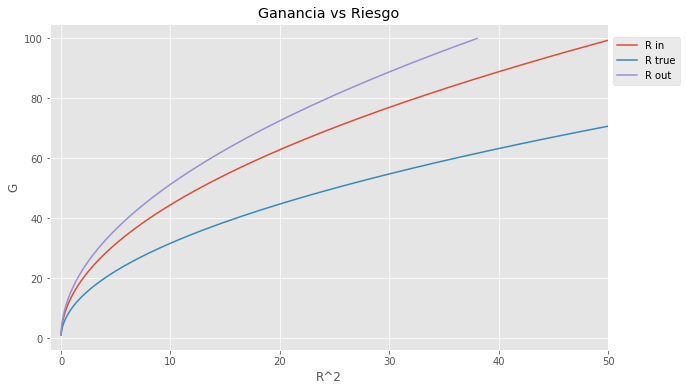

In [ ]:
""" Correlaciones In-sample  True  Out-sample """
def R_t(G, C, g):
    return G**2 / (g.T@np.linalg.inv(C)@g).flatten()
def R_in(G, E, g):
    return G**2 / (g.T@np.linalg.inv(E)@g).flatten()
def R_out(G, E,C, g):
    return ((G**2)*(g.T@np.linalg.inv(E)@C@np.linalg.inv(E)@g) / ((g.T@np.linalg.inv(E)@g)**2)).flatten()
""" Parametros Sigma y E , Dominio G"""
#np.random.seed(seed=47)
C = S/0.2
E = W/(200*0.2)
G = np.linspace(1,100,200)
""" Correlaciones In-sample  True  Out-sample """
R_true = R_t(G,C,g) # True
R_in = R_in(G,E,g) # In-sample
R_out = R_out(G,E, S, g) # Out-sample
fig = plt.figure(figsize = (10, 6))
plt.xlim((-1,50)) 
plt.plot(R_in.flatten(), G, label ="R in")
plt.plot(R_true.flatten(), G, label ="R true")
plt.plot(R_out.flatten(), G, label ="R out")
plt.title("Ganancia vs Riesgo")
ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

Podemos corroborar que tienen comportamientos similares, sin embargo, la matriz de correlaciones sobreestima el riesgo asociado del portafolio a comparación de la matriz de covarianzas.

* ¿Cómo cambia el comportamiento al variar $p,n$ o $q=p/n$?

Notemos que $q<=1$. Así, aseguramos el marco teórico en el cual nos enfocamos. Por lo anterior, notemos que conforme el número de elementos a analizar $p$ crece, para concordancia en la teoría $n$, el número de observaciones, debe crecer en alguna proporción con respecto a $n$.

Sin importar la elección de $n$ y $p$ cuando $q=1$, el sesgo entre los riesgos dentro de muestra y fuera de muestra incrementa de modo que la frontera óptima dentro de muestra diverge y la frontera fuera de muestra se acerca al eje vertical.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


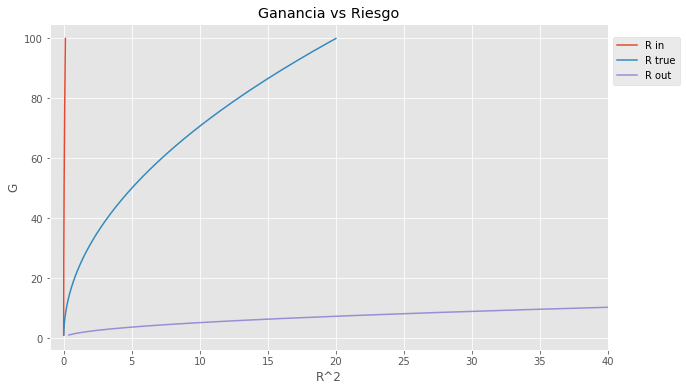

In [ ]:
""" Implementacion Rs """
def R_t(G, S, g):
    return G**2 / (g.T@np.linalg.inv(S)@g).flatten()
def R_in(G, E, g):
    return G**2 / (g.T@np.linalg.inv(E)@g).flatten()
def R_out(G, E, S, g):
    return ((G**2)*(g.T@np.linalg.inv(E)@S@np.linalg.inv(E)@g) / ((g.T@np.linalg.inv(E)@g)**2)).flatten()
""" Parametros Sigma y E , Dominio G"""
np.random.seed(seed=47)
p = 100
g = np.ones((p,1)) 
G = np.linspace(1,100,200)
S = np.identity(p)*0.2
W = wishart.rvs(df=100, scale=S, size =1, random_state = None)
E = W/199

""" Covarianzas In-sample  True  Out-sample """
R_true = R_t(G,S,g) # True
R_in = R_in(G,E,g) # In-sample
R_out = R_out(G,E, S, g) # Out-sample
fig = plt.figure(figsize = (10, 6))
plt.xlim((-1, 40))
plt.plot(R_in.flatten(), G, label ="R in")
plt.plot(R_true.flatten(), G, label ="R true")
plt.plot(R_out.flatten(), G, label ="R out")
plt.title("Ganancia vs Riesgo")
ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

Si $q$ decrece, se infiere que $n$ es mayor que $p$ de modo que la frontera óptima real converge a la dentro de muestra y la fuera de muestra se aleja.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


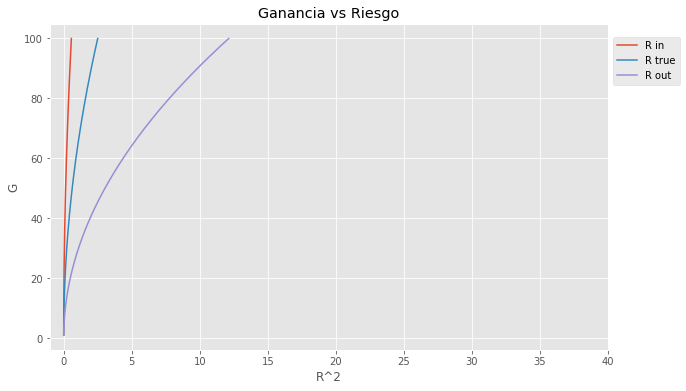

In [ ]:
""" Implementacion Rs """
def R_t(G, S, g):
    return G**2 / (g.T@np.linalg.inv(S)@g).flatten()
def R_in(G, E, g):
    return G**2 / (g.T@np.linalg.inv(E)@g).flatten()
def R_out(G, E, S, g):
    return ((G**2)*(g.T@np.linalg.inv(E)@S@np.linalg.inv(E)@g) / ((g.T@np.linalg.inv(E)@g)**2)).flatten()
""" Parametros Sigma y E , Dominio G"""
np.random.seed(seed=47)
p = 800
g = np.ones((p,1)) 
G = np.linspace(1,100,200)
S = np.identity(p)*0.2
W = wishart.rvs(df=1000, scale=S, size =1, random_state = None)
E = W/1000

""" Covarianzas In-sample  True  Out-sample """
R_true = R_t(G,S,g) # True
R_in = R_in(G,E,g) # In-sample
R_out = R_out(G,E, S, g) # Out-sample
fig = plt.figure(figsize = (10, 6))
plt.xlim((-1, 40))
plt.plot(R_in.flatten(), G, label ="R in")
plt.plot(R_true.flatten(), G, label ="R true")
plt.plot(R_out.flatten(), G, label ="R out")
plt.title("Ganancia vs Riesgo")
ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

Si $n$ constante y $p$ incrementa de manera que $q \to 1$ se observa que las tres fronteras se acercan más al eje vertical.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


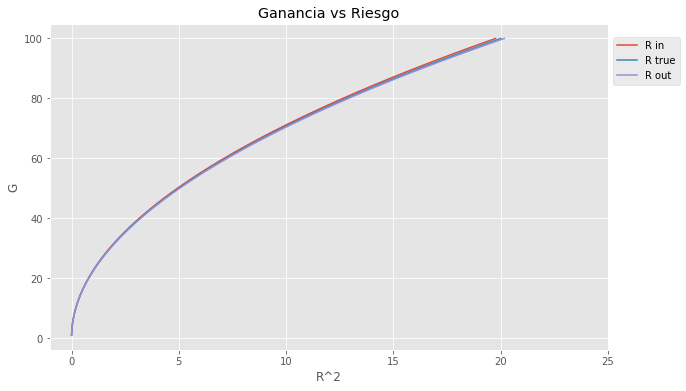

In [ ]:
""" Implementacion Rs """
def R_t(G, S, g):
    return G**2 / (g.T@np.linalg.inv(S)@g).flatten()
def R_in(G, E, g):
    return G**2 / (g.T@np.linalg.inv(E)@g).flatten()
def R_out(G, E, S, g):
    return ((G**2)*(g.T@np.linalg.inv(E)@S@np.linalg.inv(E)@g) / ((g.T@np.linalg.inv(E)@g)**2)).flatten()
""" Parametros Sigma y E , Dominio G"""
np.random.seed(seed=47)
p = 100
g = np.ones((p,1)) 
G = np.linspace(1,100,200)
S = np.identity(p)*0.2
W = wishart.rvs(df=10000, scale=S, size =1, random_state = None)
E = W/10000

""" Covarianzas In-sample  True  Out-sample """
R_true = R_t(G,S,g) # True
R_in = R_in(G,E,g) # In-sample
R_out = R_out(G,E, S, g) # Out-sample
fig = plt.figure(figsize = (10, 6))
plt.xlim((-1, 25))
plt.plot(R_in.flatten(), G, label ="R in")
plt.plot(R_true.flatten(), G, label ="R true")
plt.plot(R_out.flatten(), G, label ="R out")
plt.title("Ganancia vs Riesgo")
ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

Conforme $n$ se aleja mucho más de $p$ podemos observar que el sesgo decrece, el mismo caso en el que $q \to 0$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


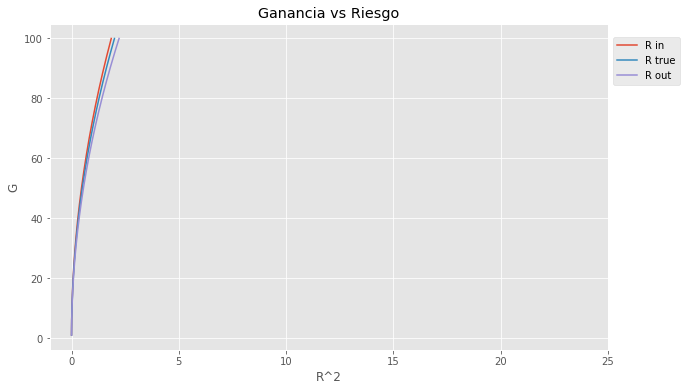

In [ ]:
""" Implementacion Rs """
def R_t(G, S, g):
    return G**2 / (g.T@np.linalg.inv(S)@g).flatten()
def R_in(G, E, g):
    return G**2 / (g.T@np.linalg.inv(E)@g).flatten()
def R_out(G, E, S, g):
    return ((G**2)*(g.T@np.linalg.inv(E)@S@np.linalg.inv(E)@g) / ((g.T@np.linalg.inv(E)@g)**2)).flatten()
""" Parametros Sigma y E , Dominio G"""
np.random.seed(seed=47)
p = 1000
g = np.ones((p,1)) 
G = np.linspace(1,100,200)
S = np.identity(p)*0.2
W = wishart.rvs(df=10000, scale=S, size =1, random_state = None)
E = W/10000

""" Covarianzas In-sample  True  Out-sample """
R_true = R_t(G,S,g) # True
R_in = R_in(G,E,g) # In-sample
R_out = R_out(G,E, S, g) # Out-sample
fig = plt.figure(figsize = (10, 6))
plt.xlim((-1, 25))
plt.plot(R_in.flatten(), G, label ="R in")
plt.plot(R_true.flatten(), G, label ="R true")
plt.plot(R_out.flatten(), G, label ="R out")
plt.title("Ganancia vs Riesgo")
ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

Si $p$ incrementa de manera que $p \to \infty$ con $p << n$ entonces se observa que las tres fronteras divergen.

* ¿Cómo cambia el comportamiento de los resultados al variar el valor de $\sigma^{2}?$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


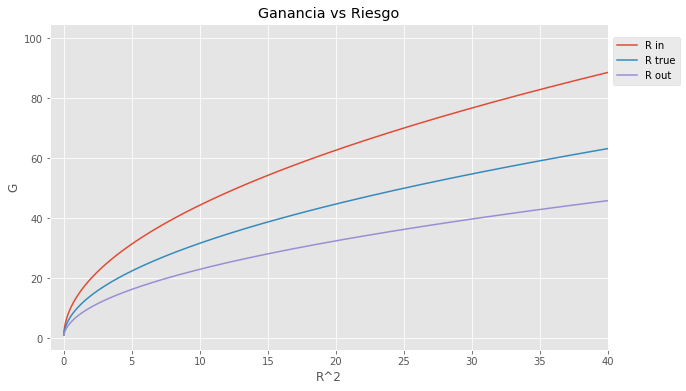

In [ ]:
""" Implementacion Rs """
def R_t(G, S, g):
    return G**2 / (g.T@np.linalg.inv(S)@g).flatten()
def R_in(G, E, g):
    return G**2 / (g.T@np.linalg.inv(E)@g).flatten()
def R_out(G, E, S, g):
    return ((G**2)*(g.T@np.linalg.inv(E)@S@np.linalg.inv(E)@g) / ((g.T@np.linalg.inv(E)@g)**2)).flatten()
""" Parametros Sigma y E , Dominio G"""
np.random.seed(seed=47)
p = 100
g = np.ones((p,1)) 
G = np.linspace(1,100,200)
S = np.identity(p)*1
W = wishart.rvs(df=200, scale=S, size =1, random_state = None)
E = W/199

""" Covarianzas In-sample  True  Out-sample """
R_true = R_t(G,S,g) # True
R_in = R_in(G,E,g) # In-sample
R_out = R_out(G,E, S, g) # Out-sample
fig = plt.figure(figsize = (10, 6))
plt.xlim((-1, 40))
plt.plot(R_in.flatten(), G, label ="R in")
plt.plot(R_true.flatten(), G, label ="R true")
plt.plot(R_out.flatten(), G, label ="R out")
plt.title("Ganancia vs Riesgo")
ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


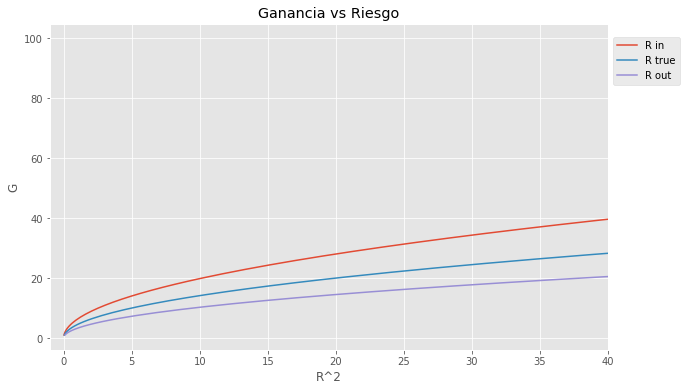

In [ ]:
""" Implementacion Rs """
def R_t(G, S, g):
    return G**2 / (g.T@np.linalg.inv(S)@g).flatten()
def R_in(G, E, g):
    return G**2 / (g.T@np.linalg.inv(E)@g).flatten()
def R_out(G, E, S, g):
    return ((G**2)*(g.T@np.linalg.inv(E)@S@np.linalg.inv(E)@g) / ((g.T@np.linalg.inv(E)@g)**2)).flatten()
""" Parametros Sigma y E , Dominio G"""
np.random.seed(seed=47)
p = 100
g = np.ones((p,1)) 
G = np.linspace(1,100,200)
S = np.identity(p)*5
W = wishart.rvs(df=200, scale=S, size =1, random_state = None)
E = W/199

""" Covarianzas In-sample  True  Out-sample """
R_true = R_t(G,S,g) # True
R_in = R_in(G,E,g) # In-sample
R_out = R_out(G,E, S, g) # Out-sample
fig = plt.figure(figsize = (10, 6))
plt.xlim((-1, 40))
plt.plot(R_in.flatten(), G, label ="R in")
plt.plot(R_true.flatten(), G, label ="R true")
plt.plot(R_out.flatten(), G, label ="R out")
plt.title("Ganancia vs Riesgo")
ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

Podemos observar que conforme $\sigma^{2}$ incrementa, las fronteras se acercan y asimilan el eje horizontal.

* ¿Cómo cambia el comportamiento ante otra elección del valor de la ganancia esperada del portafolio $\texttt{g}$?$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


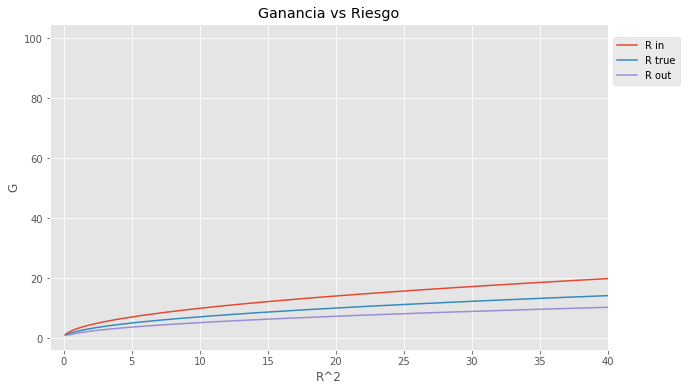

In [ ]:
""" Implementacion Rs """
def R_t(G, S, g):
    return G**2 / (g.T@np.linalg.inv(S)@g).flatten()
def R_in(G, E, g):
    return G**2 / (g.T@np.linalg.inv(E)@g).flatten()
def R_out(G, E, S, g):
    return ((G**2)*(g.T@np.linalg.inv(E)@S@np.linalg.inv(E)@g) / ((g.T@np.linalg.inv(E)@g)**2)).flatten()
""" Parametros Sigma y E , Dominio G"""
np.random.seed(seed=47)
p = 100
g = np.ones(p)*0.1
G = np.linspace(1,100,200)
S = np.identity(p)*0.2
W = wishart.rvs(df=200, scale=S, size =1, random_state = None)
E = W/199

""" Covarianzas In-sample  True  Out-sample """
R_true = R_t(G,S,g) # True
R_in = R_in(G,E,g) # In-sample
R_out = R_out(G,E, S, g) # Out-sample
fig = plt.figure(figsize = (10, 6))
plt.xlim((-1, 40))
plt.plot(R_in.flatten(), G, label ="R in")
plt.plot(R_true.flatten(), G, label ="R true")
plt.plot(R_out.flatten(), G, label ="R out")
plt.title("Ganancia vs Riesgo")
ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


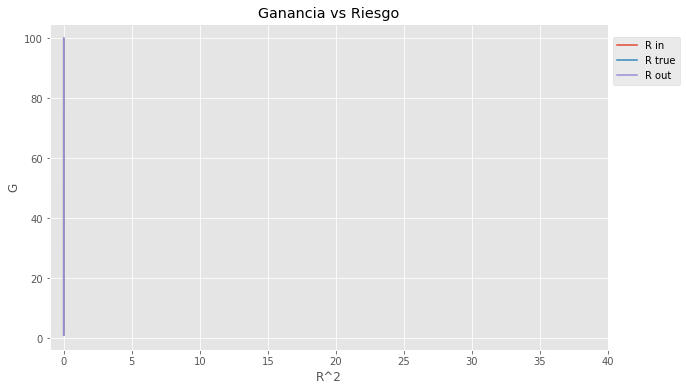

In [ ]:
""" Implementacion Rs """
def R_t(G, S, g):
    return G**2 / (g.T@np.linalg.inv(S)@g).flatten()
def R_in(G, E, g):
    return G**2 / (g.T@np.linalg.inv(E)@g).flatten()
def R_out(G, E, S, g):
    return ((G**2)*(g.T@np.linalg.inv(E)@S@np.linalg.inv(E)@g) / ((g.T@np.linalg.inv(E)@g)**2)).flatten()
""" Parametros Sigma y E , Dominio G"""
np.random.seed(seed=47)
p = 100
g = np.ones(p)*100
G = np.linspace(1,100,200)
S = np.identity(p)*0.2
W = wishart.rvs(df=200, scale=S, size =1, random_state = None)
E = W/199

""" Covarianzas In-sample  True  Out-sample """
R_true = R_t(G,S,g) # True
R_in = R_in(G,E,g) # In-sample
R_out = R_out(G,E, S, g) # Out-sample
fig = plt.figure(figsize = (10, 6))
plt.xlim((-1, 40))
plt.plot(R_in.flatten(), G, label ="R in")
plt.plot(R_true.flatten(), G, label ="R true")
plt.plot(R_out.flatten(), G, label ="R out")
plt.title("Ganancia vs Riesgo")
ax = plt.axes()
ax.set_xlabel('R^2')
ax.set_ylabel('G')
plt.legend(loc="upper left", bbox_to_anchor = (1,.975))

Sí $\sigma^{2} \to 0$ entonces, las fronteras se van a 0 y cuando $\sigma^{2} \to \infty$ las fronteras divergen.

## Ejercicio 3

Realizar el siguiente procedimiento para aplicar estimadores alternativos al método RIE en un portafolio con datos reales.

* Obtener $p=50$ series financieras para $n=200$ días de transacción.

#### Solución

Tomamos una lista de activos que cotizan bajo criterio de capitalización de mercado, es decir, se seleccionaron aleatoriamente dentro del TOP 100 de capitalización de mercado de los datos financieros de yahoo!; más petróleo crudo, oro, plata, cobre y algunas criptomonedas como lo son Bitcoin, Ehtereum, Dogecoin, Link y Tether.

In [ ]:
prices_list = ["FUJIY","MSBHF","HMC","NTDOY","HG=F","GC=F","CL=F","BTC-USD","LINK-USD","DOGE-USD","USDT-USD",
"ETH-USD","GME","AMC","AAPL","MSFT","GOOG","AMZN","TM","FB","TSLA","BRKB","JPM","TSMN","TCEHYN","NVDA","SONY",
"V","BAC","SMSN.IL","JNJ","BABA","WMT","NESNN","UNH","MA","HD","PG","ASMLN","ROGN","DIS","PYPL","ATCC",
"ADBE","NFLX","XOM","CMCSA","ORCL","PFE","CSCO","NKE","KO","TMO","VZ","NVON","LLY","DHR","PEP","ABT",
"MRK","ACN","CVX","COST","C","AVGO","T","WFC","ABBV","MS","AZN","NVS","MCD","TXN"]
print(len(prices_list))

73


Posteriormente procedemos a extraer una muestra de 50 activos aleatoriamente. 

In [ ]:
print(prices_list)
# select a subset without replacement
print('Muestra :')
rndm.sample(prices_list, 3)

['FUJIY', 'MSBHF', 'HMC', 'NTDOY', 'HG=F', 'GC=F', 'CL=F', 'BTC-USD', 'LINK-USD', 'DOGE-USD', 'USDT-USD', 'ETH-USD', 'GME', 'AMC', 'AAPL', 'MSFT', 'GOOG', 'AMZN', 'TM', 'FB', 'TSLA', 'BRKB', 'JPM', 'TSMN', 'TCEHYN', 'NVDA', 'SONY', 'V', 'BAC', 'SMSN.IL', 'JNJ', 'BABA', 'WMT', 'NESNN', 'UNH', 'MA', 'HD', 'PG', 'ASMLN', 'ROGN', 'DIS', 'PYPL', 'ATCC', 'ADBE', 'NFLX', 'XOM', 'CMCSA', 'ORCL', 'PFE', 'CSCO', 'NKE', 'KO', 'TMO', 'VZ', 'NVON', 'LLY', 'DHR', 'PEP', 'ABT', 'MRK', 'ACN', 'CVX', 'COST', 'C', 'AVGO', 'T', 'WFC', 'ABBV', 'MS', 'AZN', 'NVS', 'MCD', 'TXN']
Muestra :


['LINK-USD', 'TXN', 'BTC-USD']

In [ ]:
ok = yf.download("SMSN.IL", period="3y",interval = "1d")
jamon = list(ok['Close'][-365:-1])
jamon.reverse()
print(jamon)

[*********************100%***********************]  1 of 1 completed
[1483.5, 1538.0, 1527.5, 1549.0, 1562.5, 1565.0, 1584.0, 1640.5, 1632.0, 1653.5, 1596.5, 1585.0, 1580.0, 1624.5, 1618.5, 1640.5, 1639.5, 1634.0, 1611.5, 1613.5, 1623.0, 1639.5, 1670.0, 1658.0, 1647.5, 1663.5, 1635.5, 1606.0, 1596.0, 1618.5, 1618.0, 1575.0, 1538.5, 1554.5, 1585.5, 1570.0, 1580.5, 1596.0, 1638.5, 1694.5, 1735.0, 1794.0, 1773.0, 1799.5, 1813.5, 1773.0, 1727.0, 1716.5, 1740.0, 1712.0, 1691.0, 1720.0, 1713.5, 1733.0, 1721.0, 1719.5, 1697.0, 1742.0, 1768.5, 1740.0, 1744.0, 1750.5, 1756.5, 1732.5, 1778.0, 1799.0, 1776.5, 1772.0, 1769.0, 1783.5, 1784.5, 1804.5, 1814.0, 1791.5, 1758.5, 1765.0, 1762.5, 1766.0, 1789.0, 1840.0, 1827.0, 1814.0, 1817.0, 1826.0, 1821.0, 1833.5, 1837.5, 1864.5, 1846.0, 1818.5, 1822.5, 1808.0, 1781.5, 1796.0, 1779.5, 1782.0, 1782.0, 1790.0, 1753.0, 1763.0, 1757.0, 1783.0, 1741.0, 1744.0, 1799.0, 1855.0, 1853.5, 1821.5, 1837.0, 1816.0, 1821.0, 1849.0, 1866.0, 1866.5, 1889.0, 1866.5, 18

Realizamos la consulta de los precios de los activos a través de la api $\texttt{yfinance}$ en python, de momento consultamos 3 años para homologar después 200 días para todos los activos:

In [ ]:
rndm.seed(7)
sequence = [i for i in range(len(prices_list))]
prices_names = rndm.sample(prices_list, 50)
price_samples = {}

for price_name in prices_names:
  query = yf.download(price_name, period="3y",interval = "1d")
  prices = list(query['Close'][-731:-1])
  price_samples[price_name] = prices

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

* Calcular los retornos diarios y mostrar la distribución de los retornos (agregados) en un histograma.

#### Solución

In [ ]:
retornos = {}
for name in prices_names:
  retorno = [(price_samples[name][i]-price_samples[name][i-1])/price_samples[name][i-1] for i in range(1,730)]
  retornos[name] = retorno

Text(0.5, 1.0, 'Distribución de retornos acumulados por día')

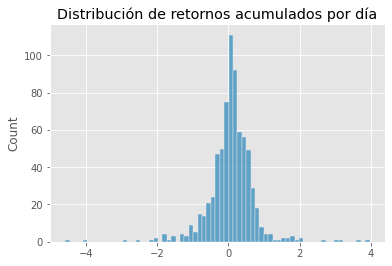

In [ ]:
retornos_m = pd.DataFrame(retornos)
agregado_por_dia = retornos_m.sum(axis=1)
sns.histplot(agregado_por_dia)
plt.title("Distribución de retornos acumulados por día")

* Muestre en una tabla los estadísticos descriptivos de los retornos: media, std, curtosis, asimetría, test raíz unitaria, test JB.

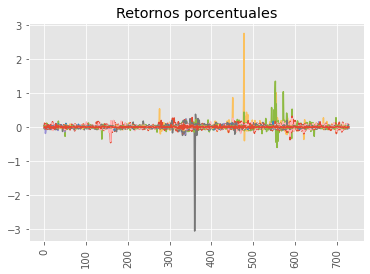

In [ ]:
plt.title('Retornos porcentuales')
plt.plot(retornos_m) 
plt.xticks(rotation=90) 
plt.show()

#### Solución

In [ ]:
for name in prices_names:
  if len(price_samples[name]) < 730:
    print(name)
retornos_m = pd.DataFrame(retornos)
scaler = StandardScaler()
scaler.fit(retornos_m)
retornos_std = scaler.transform(retornos_m)
retornos_std = pd.DataFrame(retornos_std)
retornos_std = retornos_std.set_axis(prices_names, axis=1, inplace=False)
retornos_std.describe()
# Falta realizar tests

,PYPL,FB,NKE,CL=F,DOGE-USD,GME,CMCSA,BTC-USD,AVGO,V,HMC,GC=F,C,SONY,HG=F,MSFT,CVX,MA,ACN,NTDOY,TMO,HD,T,AAPL,DIS,PFE,PG,VZ,KO,WFC,NVDA,XOM,CSCO,COST,LLY,LINK-USD,TM,MRK,MS,NVS,MCD,ETH-USD,TXN,NFLX,SMSN.IL,TSLA,AZN,BABA,JNJ,AMZN
count,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02
mean,1.370646e-18,2.019799e-17,1.241196e-17,-2.252047e-17,-1.709351e-17,6.217401e-17,2.825053e-17,1.005140e-17,-1.522940e-18,7.005523e-18,-5.177995e-18,-1.387005e-17,-2.322483e-17,1.507710e-17,-2.406245e-17,-3.959643e-18,-8.909197e-18,6.396347e-18,-1.264992e-17,-1.279269e-17,3.807349e-18,6.282126e-18,2.234914e-17,2.017895e-18,1.180278e-18,1.142205e-18,2.893585e-18,4.664003e-19,1.126975e-17,-9.480299e-18,-3.967258e-17,4.568819e-19,1.355416e-17,2.482392e-17,-1.903675e-17,3.198173e-18,-1.218352e-18,-1.522940e-18,-2.244432e-17,3.369504e-18,2.360556e-18,-2.002666e-17,1.001333e-17,-5.787171e-18,-3.441844e-17,-5.170380e-17,-4.073864e-18,-8.833050e-18,-5.749097e-18,6.853229e-18
std,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00
min,-6.372842e+00,-6.306306e+00,-5.778772e+00,-2.373251e+01,-2.999979e+00,-5.443896e+00,-4.723593e+00,-9.404560e+00,-8.250852e+00,-7.122368e+00,-5.181651e+00,-4.843505e+00,-6.823642e+00,-4.782563e+00,-4.847681e+00,-7.543285e+00,-8.701702e+00,-5.780580e+00,-4.690648e+00,-3.391550e+00,-4.567449e+00,-1.045932e+01,-5.649702e+00,-5.872295e+00,-5.986089e+00,-4.657398e+00,-6.023334e+00,-5.422601e+00,-6.337253e+00,-5.985206e+00,-6.088058e+00,-5.202540e+00,-5.762748e+00,-6.026458e+00,-4.886489e+00,-6.727307e+00,-6.190371e+00,-5.806530e+00,-6.326927e+00,-7.228950e+00,-9.466918e+00,-8.172596e+00,-5.576282e+00,-4.512710e+00,-5.641854e+00,-5.093037e+00,-6.118422e+00,-5.779639e+00,-6.981563e+00,-4.085061e+00
25%,-5.200769e-01,-4.877305e-01,-4.319011e-01,-5.926561e-02,-2.444966e-01,-3.072945e-01,-4.607604e-01,-4.524081e-01,-4.470226e-01,-4.199198e-01,-4.993159e-01,-4.041535e-01,-4.022298e-01,-5.465499e-01,-5.623329e-01,-4.366542e-01,-3.955822e-01,-4.020533e-01,-3.883726e-01,-5.251815e-01,-4.866023e-01,-3.998894e-01,-4.016332e-01,-4.388948e-01,-4.271512e-01,-5.141424e-01,-4.209810e-01,-4.357035e-01,-3.780139e-01,-4.498833e-01,-4.779055e-01,-4.897236e-01,-4.217745e-01,-4.628439e-01,-4.650874e-01,-5.402722e-01,-4.651595e-01,-4.753618e-01,-4.511037e-01,-4.684318e-01,-3.512834e-01,-4.615262e-01,-4.998073e-01,-5.164768e-01,-5.641609e-01,-4.857317e-01,-4.989615e-01,-5.315703e-01,-4.135901e-01,-4.952823e-01
50%,1.125755e-02,-3.556281e-03,-1.131601e-02,4.542804e-02,-8.779525e-02,-9.909465e-02,9.433152e-04,-3.804667e-02,3.066698e-02,3.318651e-02,4.481391e-02,3.746682e-02,6.556560e-03,8.619884e-03,-1.138738e-02,-7.692951e-03,9.593596e-03,3.069674e-02,3.494650e-02,-4.854786e-02,6.697040e-02,4.250722e-02,5.879609e-02,-9.144893e-03,-2.450737e-02,-8.660209e-03,1.451360e-02,1.635423e

In [ ]:
descriptivos=retornos_std.describe()
kurtosis=sp.kurtosis(retornos_std,axis=0)
asimetria=sp.skew(retornos_std,axis=0)
descriptivos.loc['kurtosis'] = kurtosis
descriptivos.loc['asimetria'] = asimetria
descriptivos.drop(index=['count', 'min', '25%', '50%', '75%', 'max'])
descriptivos

,PYPL,FB,NKE,CL=F,DOGE-USD,GME,CMCSA,BTC-USD,AVGO,V,HMC,GC=F,C,SONY,HG=F,MSFT,CVX,MA,ACN,NTDOY,TMO,HD,T,AAPL,DIS,PFE,PG,VZ,KO,WFC,NVDA,XOM,CSCO,COST,LLY,LINK-USD,TM,MRK,MS,NVS,MCD,ETH-USD,TXN,NFLX,SMSN.IL,TSLA,AZN,BABA,JNJ,AMZN
count,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02,7.290000e+02
mean,1.370646e-18,2.019799e-17,1.241196e-17,-2.252047e-17,-1.709351e-17,6.217401e-17,2.825053e-17,1.005140e-17,-1.522940e-18,7.005523e-18,-5.177995e-18,-1.387005e-17,-2.322483e-17,1.507710e-17,-2.406245e-17,-3.959643e-18,-8.909197e-18,6.396347e-18,-1.264992e-17,-1.279269e-17,3.807349e-18,6.282126e-18,2.234914e-17,2.017895e-18,1.180278e-18,1.142205e-18,2.893585e-18,4.664003e-19,1.126975e-17,-9.480299e-18,-3.967258e-17,4.568819e-19,1.355416e-17,2.482392e-17,-1.903675e-17,3.198173e-18,-1.218352e-18,-1.522940e-18,-2.244432e-17,3.369504e-18,2.360556e-18,-2.002666e-17,1.001333e-17,-5.787171e-18,-3.441844e-17,-5.170380e-17,-4.073864e-18,-8.833050e-18,-5.749097e-18,6.853229e-18
std,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00,1.000687e+00
min,-6.372842e+00,-6.306306e+00,-5.778772e+00,-2.373251e+01,-2.999979e+00,-5.443896e+00,-4.723593e+00,-9.404560e+00,-8.250852e+00,-7.122368e+00,-5.181651e+00,-4.843505e+00,-6.823642e+00,-4.782563e+00,-4.847681e+00,-7.543285e+00,-8.701702e+00,-5.780580e+00,-4.690648e+00,-3.391550e+00,-4.567449e+00,-1.045932e+01,-5.649702e+00,-5.872295e+00,-5.986089e+00,-4.657398e+00,-6.023334e+00,-5.422601e+00,-6.337253e+00,-5.985206e+00,-6.088058e+00,-5.202540e+00,-5.762748e+00,-6.026458e+00,-4.886489e+00,-6.727307e+00,-6.190371e+00,-5.806530e+00,-6.326927e+00,-7.228950e+00,-9.466918e+00,-8.172596e+00,-5.576282e+00,-4.512710e+00,-5.641854e+00,-5.093037e+00,-6.118422e+00,-5.779639e+00,-6.981563e+00,-4.085061e+00
25%,-5.200769e-01,-4.877305e-01,-4.319011e-01,-5.926561e-02,-2.444966e-01,-3.072945e-01,-4.607604e-01,-4.524081e-01,-4.470226e-01,-4.199198e-01,-4.993159e-01,-4.041535e-01,-4.022298e-01,-5.465499e-01,-5.623329e-01,-4.366542e-01,-3.955822e-01,-4.020533e-01,-3.883726e-01,-5.251815e-01,-4.866023e-01,-3.998894e-01,-4.016332e-01,-4.388948e-01,-4.271512e-01,-5.141424e-01,-4.209810e-01,-4.357035e-01,-3.780139e-01,-4.498833e-01,-4.779055e-01,-4.897236e-01,-4.217745e-01,-4.628439e-01,-4.650874e-01,-5.402722e-01,-4.651595e-01,-4.753618e-01,-4.511037e-01,-4.684318e-01,-3.512834e-01,-4.615262e-01,-4.998073e-01,-5.164768e-01,-5.641609e-01,-4.857317e-01,-4.989615e-01,-5.315703e-01,-4.135901e-01,-4.952823e-01
50%,1.125755e-02,-3.556281e-03,-1.131601e-02,4.542804e-02,-8.779525e-02,-9.909465e-02,9.433152e-04,-3.804667e-02,3.066698e-02,3.318651e-02,4.481391e-02,3.746682e-02,6.556560e-03,8.619884e-03,-1.138738e-02,-7.692951e-03,9.593596e-03,3.069674e-02,3.494650e-02,-4.854786e-02,6.697040e-02,4.250722e-02,5.879609e-02,-9.144893e-03,-2.450737e-02,-8.660209e-03,1.451360e-02,1.635423e

* Calcular la matriz de covarianza y mostrar su mapa de calor.

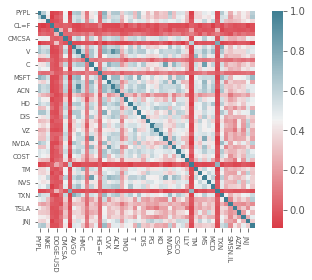

In [ ]:
cov_m = retornos_std.cov()
ax = sns.heatmap(
    cov_m, 
   # vmin=0, vmax=0.01, #center=0,
    cmap=sns.diverging_palette(10, 220, n=300),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=270,
    horizontalalignment='right',
    size = 7
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    #rotation=45,
    #horizontalalignment='right',
    size = 6.5
);

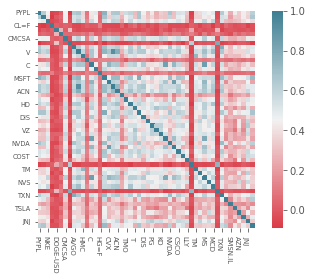

In [ ]:
# Verificamos correlaciones
corr_m = retornos_std.corr()
ax = sns.heatmap(
    corr_m, 
    #vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=300),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=270,
    horizontalalignment='right',
    size = 7
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    #rotation=45,
    #horizontalalignment='right',
    size = 6.5
);

* Considerar las ganancias esperadas $\texttt{g} = 1$ y calcular la frontera óptima dentro y fuera de muestra. Para esto dividir la matriz de datos en dos periodos el primero lo usará para el caso dentro de muestra y el segundo para el caso fuera de muestra de tal manea que $q=1/2$.

#### Solución

Dividimos la muestra en dos:

In [ ]:
in_sample = {}
out_sample = {}
# PARTIMOS MUESTRA
for name in prices_names:
  in_sample[name] = retornos_std[name][528:628]
  out_sample[name] = retornos_std[name][629:729]
# IN-SAMPLE
E_in = pd.DataFrame(in_sample)
# OUT-SAMPLE
E_out = pd.DataFrame(out_sample)

In [ ]:
E_in.describe()

,PYPL,FB,NKE,CL=F,DOGE-USD,GME,CMCSA,BTC-USD,AVGO,V,HMC,GC=F,C,SONY,HG=F,MSFT,CVX,MA,ACN,NTDOY,TMO,HD,T,AAPL,DIS,PFE,PG,VZ,KO,WFC,NVDA,XOM,CSCO,COST,LLY,LINK-USD,TM,MRK,MS,NVS,MCD,ETH-USD,TXN,NFLX,SMSN.IL,TSLA,AZN,BABA,JNJ,AMZN
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.052409,-0.007511,-0.073852,0.055983,0.104615,0.377048,0.028919,-0.187995,-0.042309,-0.007708,0.016013,-0.063815,0.066352,-0.072391,0.162921,-0.022687,0.072593,-0.008688,-0.015281,-0.111934,-0.077176,0.041863,0.057362,-0.082570,-0.017263,0.026518,-0.045790,-0.009359,0.004566,0.172472,-0.060632,0.145921,0.063626,-0.047356,0.012311,-0.091809,-0.034766,-0.023507,0.058791,-0.034721,0.012816,-0.042920,-0.002993,-0.077995,0.001250,-0.113850,0.013386,-0.102361,0.057574,-0.063447
std,1.061175,0.889042,0.830007,0.168271,1.190139,2.312067,0.870279,1.199466,0.904449,0.812968,0.852530,0.982844,0.687292,1.085623,1.211459,0.754430,0.662209,0.802237,0.701988,0.927731,0.918328,0.731915,0.724426,0.862785,0.791588,0.634785,0.706557,0.907459,0.714374,0.864331,0.893251,0.884765,0.650258,0.807330,0.998417,1.363463,0.893037,0.765886,0.724357,0.833842,0.650275,1.329905,0.971887,1.056879,0.960523,0.993657,0.825514,1.225833,0.704479,0.807062
min,-2.570228,-1.862730,-2.076353,-0.521343,-2.719971,-5.443896,-2.242650,-3.537426,-2.697580,-3.302321,-1.749607,-3.987529,-2.461989,-2.399137,-3.162378,-1.566836,-1.693225,-2.570116,-1.703486,-2.204039,-2.781118,-2.225475,-1.837033,-1.954644,-1.801069,-1.732327,-2.467509,-2.592590,-2.493749,-2.946007,-2.712784,-2.044369,-1.355069,-1.701949,-4.448871,-5.472813,-1.885857,-2.895647,-1.631696,-3.417169,-2.344566,-5.287275,-2.381824,-3.016594,-2.373663,-2.127648,-2.499429,-5.779639,-2.489721,-1.804532
25%,-0.662039,-0.632567,-0.579676,-0.039576,-0.470418,-0.401770,-0.450316,-0.791310,-0.596573,-0.391186,-0.412347,-0.508968,-0.326190,-0.722450,-0.478389,-0.473267,-0.358008,-0.489734,-0.470421,-0.751568,-0.652765,-0.365366,-0.314967,-0.659949,-0.444091,-0.370788,-0.497779,-0.487971,-0.351413,-0.375331,-0.490086,-0.520671,-0.350546,-0.638296,-0.447030,-1.015286,-0.584115,-0.322575,-0.376260,-0.465891,-0.318886,-0.836132,-0.532678,-0.523016,-0.612831,-0.723726,-0.467863,-0.724281,-0.330831,-0.601856
50%,-0.015109,-0.081018,-0.132895,0.069822,-0.118969,-0.097267,-0.012803,-0.136183,0.018266,-0.064360,0.099978,-0.053448,0.078144,-0.106812,0.123507,-0.035721,0.119057,-0.025934,0.027159,-0.146544,-0.094993,0.153001,0.081605,-0.119379,-0.024108,0.031080,-0.049340,0.016754,0.077861,0.126801,-0.054285,0.156734,0.047522,-0.100706,0.033813,-0.086946,0.012783,-0.018728,-0.006652,-0.048778,-0.021949,-0.002070,-0.009662,-0.079620,-0.160940,-0.138478,-0.003701,-0.154746,0.096697,0.029849
75%,0.645793,0.582579,0.417902,0.146581,0.506031,0.489327,0.475143,0.391312,0.526422,0.489196,0.453584,0.462989,0.485402,0.397214,0.825315,0.489564,0.459586,0.526021,0.356149,0.437698,0.515698,0.512206,0.454210,0.497174,0.273770,0.396269,0.424215,0.471852,0.470841,0.812442,0.536049,0.672927,0.403173,0.448632,0.387470,0.747805,0.472061,0.445039,0.505954,0.519447,0.410726,0.678740,0.584341,0.370894,0.630305,0.394491,0.573458,0.508955,0.522662,0.456620
max,2.852340,3.133502,2.352107,0.491606,7.203994,11.982067,3.637265,2.814007,2.126807,2.003072,2.168118,2.571328,2.008287,6.296576,4.706056,1.768180,1.685487,2.127763,2.436178,3.380654,2.312128,1.366576,2.540730,2.348193,2.838379,1.826303,2.097973,4.299754,1.451100,2.656096,2.480409,2.057197,2.071838,1.841818,5.612721,4.505917,3.

In [ ]:
E_out.describe()

,PYPL,FB,NKE,CL=F,DOGE-USD,GME,CMCSA,BTC-USD,AVGO,V,HMC,GC=F,C,SONY,HG=F,MSFT,CVX,MA,ACN,NTDOY,TMO,HD,T,AAPL,DIS,PFE,PG,VZ,KO,WFC,NVDA,XOM,CSCO,COST,LLY,LINK-USD,TM,MRK,MS,NVS,MCD,ETH-USD,TXN,NFLX,SMSN.IL,TSLA,AZN,BABA,JNJ,AMZN
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.042513,-0.033668,-0.002987,0.046285,-0.077089,-0.053773,-0.052006,0.048845,-0.011967,-0.041994,-0.016966,-0.089342,-0.035728,0.005006,-0.121674,0.007189,-0.018550,-0.060255,0.007520,-0.139473,0.052466,-0.040253,-0.096387,-0.025375,-0.027677,0.026385,-0.029163,-0.056859,-0.024770,0.005846,0.046759,0.009287,-0.009211,0.042429,0.024461,-0.009332,0.013407,0.036537,-0.001500,-0.069727,0.007888,0.018302,-0.026517,0.052161,-0.117163,-0.029340,0.012635,-0.161821,-0.057597,-0.046779
std,0.631277,0.692384,0.958059,0.147969,0.410805,0.568055,0.755897,0.896292,0.479918,0.580691,0.721991,0.874005,0.531171,0.807549,1.167398,0.537500,0.623895,0.650847,0.520148,0.842989,0.755393,0.531850,0.623417,0.555888,0.614997,0.836418,0.529752,0.431066,0.499120,0.743795,0.696716,0.764956,0.496415,0.668287,0.932726,0.872546,1.019341,0.848518,0.618830,0.579189,0.485962,0.887033,0.579868,0.535762,0.724545,0.486479,0.757569,1.012754,0.514520,0.712712
min,-2.554221,-2.205844,-3.126833,-0.551260,-1.376869,-2.506555,-4.129274,-2.859555,-1.183813,-1.667745,-1.777918,-4.487448,-1.360524,-1.896828,-3.443478,-1.913230,-1.648876,-2.568382,-1.760471,-2.759155,-2.671834,-2.297434,-3.546332,-1.568542,-1.945111,-2.353403,-1.601830,-1.229841,-1.418121,-2.306437,-1.640290,-1.459412,-1.045643,-2.059032,-2.869547,-2.860637,-3.187394,-1.347810,-1.803465,-1.585883,-1.422138,-2.540051,-2.539415,-1.367801,-1.804288,-1.365651,-2.757543,-3.103565,-1.562210,-3.903484
25%,-0.370190,-0.445900,-0.349489,-0.046459,-0.300231,-0.342104,-0.305717,-0.582050,-0.262048,-0.413272,-0.479712,-0.351626,-0.390392,-0.631050,-0.818479,-0.346255,-0.357772,-0.391073,-0.343914,-0.504766,-0.400743,-0.371612,-0.412767,-0.370485,-0.368613,-0.438269,-0.303704,-0.239797,-0.254303,-0.492178,-0.425478,-0.483470,-0.332188,-0.274809,-0.457783,-0.561024,-0.472133,-0.419346,-0.348350,-0.425681,-0.281409,-0.465669,-0.294803,-0.285073,-0.592645,-0.295974,-0.389826,-0.705292,-0.392924,-0.316798
50%,-0.003167,-0.042490,-0.048484,0.048590,-0.082852,-0.095500,0.000538,0.016854,-0.001003,-0.000685,0.052857,-0.008881,-0.041370,-0.009364,-0.126981,-0.073325,-0.010445,-0.089565,0.037364,-0.063829,0.088473,-0.018963,-0.019830,-0.011705,-0.040401,-0.050190,-0.004993,-0.034639,-0.014504,0.084155,-0.006754,-0.042496,-0.026418,0.071759,0.021239,0.020298,0.122046,-0.022733,0.019836,0.006538,0.029249,0.084229,-0.046603,0.053017,-0.112903,-0.060397,0.016107,-0.207827,-0.043433,-0.034152
75%,0.380590,0.424433,0.218266,0.142374,0.063378,0.101972,0.361492,0.617108,0.324592,0.317255,0.502139,0.305479,0.386401,0.534390,0.706824,0.404197,0.359260,0.385371,0.351856,0.451719,0.331284,0.363894,0.273245,0.369062,0.312714,0.334940,0.251367,0.263282,0.280718,0.476444,0.383843,0.465808,0.258432,0.429713,0.352408,0.447393,0.677909,0.399960,0.374939,0.324502,0.372097,0.585209,0.331681,0.347902,0.322823,0.260190,0.394149,0.457897,0.291535,0.341230
max,1.374665,2.256984,7.562195,0.445493,1.879066,2.385033,1.380230,2.390270,1.180661,1.764259,2.174369,1.837699,1.343766,1.909126,2.920528,1.215014,1.332599,1.574564,1.313417,1.945980,3.441022,1.014560,1.437838,1.292624,1.863285,2.880143,1.301849,0.838959,1.458894,1.557396,1.676515,1.757013,1.951551,2.224699,4.845345,2.13310

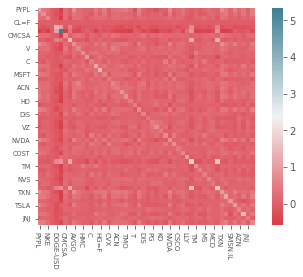

In [ ]:
# Verificamos correlaciones
cov_m = E_in.cov()
ax = sns.heatmap(
    cov_m, 
   # vmin=0, vmax=0.01, #center=0,
    cmap=sns.diverging_palette(10, 220, n=300),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=270,
    horizontalalignment='right',
    size = 7
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    #rotation=45,
    #horizontalalignment='right',
    size = 6.5
);

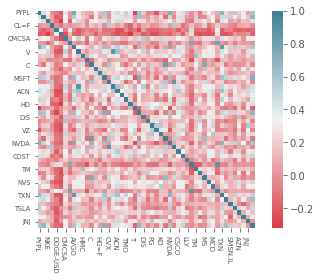

In [ ]:
# Verificamos correlaciones
corr_m = E_in.corr()
ax = sns.heatmap(
    corr_m, 
    #vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=300),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=270,
    horizontalalignment='right',
    size = 7
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    #rotation=45,
    #horizontalalignment='right',
    size = 6.5
);

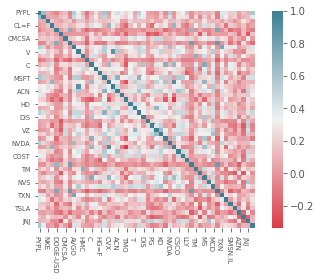

In [ ]:
# Verificamos correlaciones
corr_m = E_out.corr()
ax = sns.heatmap(
    corr_m, 
    #vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=300),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=270,
    horizontalalignment='right',
    size = 7
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    #rotation=45,
    #horizontalalignment='right',
    size = 6.5
);

In [ ]:
# Mimsa longitud
print(len(out_sample[name]))
print(len(in_sample[name]))

100
100


In [ ]:
g = np.array([1]*50)
g = g.reshape(50,1)
q = 1/2

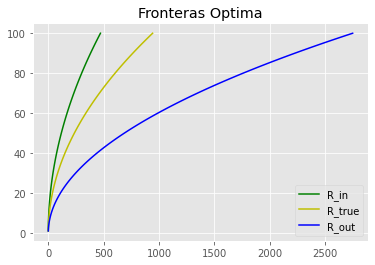

In [ ]:
# R
factor1 = np.matmul(np.linalg.inv(np.array(E_in.corr())),g)               # auxiliar
factor2 = np.matmul(np.transpose(g),np.linalg.inv(np.array(E_in.corr()))) # auxiliar
G = np.linspace(1,100,100)  # Dominio de G
# In and Out and true
R_i = lambda G: (G**2)/(np.matmul(np.transpose(g),factor1))
R_o = lambda G: (G**2)*(np.matmul(np.matmul(factor2,np.array(E_out.corr())),factor1))/(np.matmul(np.transpose(g),factor1))**2
R_t = lambda R: R/(1-q)
R_in_cs = R_i(G).flatten()
R_true_cs = R_t(R_in(G).flatten()).flatten()
R_out_cs = R_o(G).flatten()
# Plots
plt.style.use('ggplot')
plt.plot(R_i(G).flatten(), G,   c ="g", label = "R_in")
plt.plot(R_t(R_in(G).flatten()).flatten(), G,   c ="y", label = "R_true")
plt.plot(R_o(G).flatten(), G,   c ="b", label = "R_out")

plt.title('Fronteras Optima')
plt.legend()

* Aplique el método de clipping descrito en la ec. (5) de "J. Bun, J.P. Bouchaud, y M. Potters, Cleaning correlation matrices, Risk magazine, (2016)". Mostrar las fronteras con sesgo y sin sesgo en la misma figura.

#### Solución

Sacamos la cota superior de la distribución de Marcenko-Pastur y sólo conservamos aquellos valores superiores a esta cota, dados por $K$. Así
\begin{align}
  \gamma = \frac{Tr(E) - \sum_{k=K+1}^{p} \lambda_{k}}{p-K}.
\end{align}
Sustituimos aquellos valores propios menores que la cota superior por $\gamma$ y nuestro estimador va a estar dado por:
\begin{align*}
  \Xi^{clip} = \sum_{k=1}^{p} \xi^{clip}_k u_k u_k'
\end{align*}
con $u_k$ el respectivo vector propio del eigenvalor $k$.

In [ ]:
""" Marcenko Pastur """
p = 50
n = 100  
q = 1/2
l_upper = (1 + np.sqrt(q))**2
l_lower = (1 - np.sqrt(q))**2
l = np.linspace(l_upper,l_lower , 100)

MP = lambda l : np.sqrt((maximo - l)*(l - minimo))/(2*q*np.pi*l)

In [ ]:
""" Cliping """
# Eigenvalores y eigenvectores muestrales
lam_in, v_in = np.linalg.eigh(E_in.corr())
lam_in = np.sort(lam_in)[::-1]
v_in = v_in[np.argsort(lam_in)[::-1]]
# In-sample
l_sup_in =  lam_in[lam_in>l_upper]
print(l_sup_in)
print('supremos :',len(l_sup_in))
gm_in = (np.trace(E_in.corr()) - sum(list(lam_in)[3:]))/(50-3)
l_clip_in = list(lam_in)
l_clip_in[3:] = [gm_in for l in l_clip_in[3:]]
E_clip_in = sum([np.matmul(np.reshape(v_in[:,i],(50,1)),np.reshape(v_in[:,i],(1,50))) for i in range(50)])
print('gamma :',gm_in)
print('traza E in sample :',np.trace(E_in.corr()))
print('traza E_clip in sample :',np.trace(E_clip_in))

[11.22773644  5.64035872  3.62480913  2.92684511]
supremos : 4
gamma : 0.43601924009634335
traza E in sample : 50.0
traza E_clip in sample : 50.0


In [ ]:
""" Cliping """
# Eigenvalores y eigenvectores muestrales
lam_out, v_out = np.linalg.eigh(E_out.corr())
lam_out = np.sort(lam_out)[::-1]
v_out = v_out[np.argsort(lam_out)[::-1]]
# Out-sample
l_sup_out =  lam_out[lam_out>l_upper]
print(l_sup_out)
print('supremos :',len(l_sup_out))
gm_out = (np.trace(E_out.corr()) - sum(list(lam_out)[4:]))/(50-4)
l_clip_out = list(lam_out)
l_clip_out[4:] = [gm_out for l in l_clip_out[4:]]
E_clip_out = sum([np.matmul(np.reshape(v_out[:,i],(50,1)),np.reshape(v_out[:,i],(1,50))) for i in range(50)])
print('gamma :',gm_out)
print('traza E :',np.trace(E_out.corr()))
print('traza E_clip :',np.trace(E_clip_out))

[11.19584272  5.10264256  4.07724106  3.73064239]
supremos : 4
gamma : 0.5240514942340952
traza E : 50.0
traza E_clip : 50.0


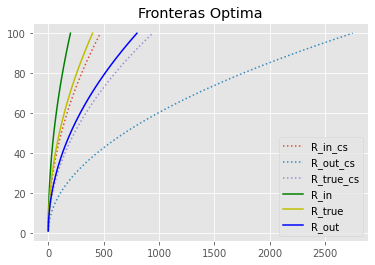

In [ ]:
""" R """
factor1 = np.matmul(np.linalg.inv(np.array(E_clip_in)),g)               # auxiliar
factor2 = np.matmul(np.transpose(g),np.linalg.inv(np.array(E_clip_in))) # auxiliar
G = np.linspace(1,100,100)  # Dominio de G
# In and Out and true
R_in =  lambda G: (G**2)/(np.matmul(np.transpose(g),factor1))
R_out = lambda G: (G**2)*(np.matmul(np.matmul(factor2,E_clip_out),factor1))/((np.matmul(np.transpose(g),factor1))**2)
R_true = lambda R: R/(1-q)
# Plots
plt.style.use('ggplot')
plt.plot(R_in_cs, G, label = "R_in_cs",linestyle='dotted')
plt.plot(R_out_cs, G, label = "R_out_cs",linestyle='dotted')
plt.plot(R_true_cs, G, label = "R_true_cs",linestyle='dotted')
plt.plot(R_in(G).flatten(), G,   c ="g", label = "R_in")
plt.plot(R_true(R_in(G).flatten()).flatten(), G,   c ="y", label = "R_true")
plt.plot(R_true(R_in(G).flatten()).flatten()/(1-q), G,   c ="b", label = "R_out")
R_in_cs
plt.title('Fronteras Optima')
plt.legend()

* Aplique el método de contración lineal descrito en la ec. (3) del mismo artículo para valores de $\alpha = \{0.1,0.3,0.5,0.7,0.9\}$. Mostrar los resultados en la misma figura.

#### Solución


$\textit{Contracción lineal básica:}$ combinación lineal de la estimación muestral y la matriz identidad:
$$ \Xi := \alpha E + (1-\alpha) I_{N}$$
con $E$ igual a la matriz de correlaciones muestral de la matriz dentro de muestra y fuera de muestra.
Calculamos: </br>
\begin{align}
  \mathcal{R}_{in}^{2} &= \frac{\mathcal{C}^{2}}{g'E^{-1}g} \\
    \mathcal{R}_{true}^{2} &= \frac{\mathcal{R}_{in}^{2}}{1-q} \\
  \mathcal{R}_{out}^{2} &= \frac{\mathcal{C}^{2}g' E^{-1}\tilde{E}E^{-1} g}{g'E^{-1} g} 
\end{align}


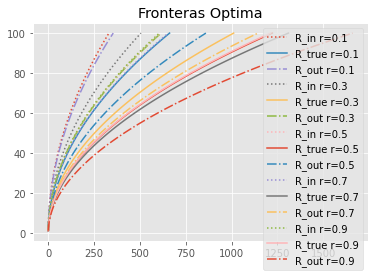

In [ ]:
""" Contracción lineal """
alpha = [0.1,0.3,0.5,0.7,0.9]

for a in alpha:
  """ R """
  E_bas_in = a*np.array(E_in.corr())+(1-a)*np.identity(50)
  E_bas_out = a*np.array(E_out.corr())+(1-a)*np.identity(50)
  factor1 = np.matmul(np.linalg.inv(E_bas_in),g)              # auxiliar
  factor2 = np.matmul(np.transpose(g),np.linalg.inv(np.array(E_bas_in))) # auxiliar
  G = np.linspace(1,100,100)  # Dominio de G
  # In and Out and true
  R_in =  lambda G: (G**2)/(np.matmul(np.transpose(g),factor1))
  R_out = lambda G: (G**2)*(np.matmul(np.matmul(factor2,E_bas_out),factor1))/((np.matmul(np.transpose(g),factor1))**2)
  R_true = lambda R: R/(1-q)
  # Plots
  plt.style.use('ggplot')
  plt.plot(R_in(G).flatten() ,G, label = "R_in r="+str(a),linestyle='dotted')
  plt.plot(R_true(R_in(G).flatten()).flatten(), G, label = "R_true r="+str(a),linestyle='solid')
  plt.plot(R_out(G).flatten(), G, label = "R_out r="+str(a),linestyle='dashdot')

  plt.title('Fronteras Optima')
  plt.legend(loc = 'upper right')

In [ ]:
!jupyter nbconvert --to html T7_TSE_DRA.ipynb

[NbConvertApp] Converting notebook T7_TSE_DRA.ipynb to html
[NbConvertApp] Writing 1185875 bytes to T7_TSE_DRA.html
